In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file = '../data/iris.csv'
data = pd.read_csv(file, header = None, usecols =[2,3,4])

In [3]:
data.columns = ['petal length', 'petal width','variety']
data = data.iloc[:100]

In [4]:
data['variety'].value_counts()

variety
Iris-setosa        50
Iris-versicolor    50
Name: count, dtype: int64

In [5]:
data.replace('Iris-setosa', 1, inplace=True)
data.replace('Iris-versicolor', 2, inplace = True)
data.replace('Iris-virginica', 2, inplace = True)

In [6]:
data.isna().sum()

petal length    0
petal width     0
variety         0
dtype: int64

In [7]:
data.duplicated().sum()

42

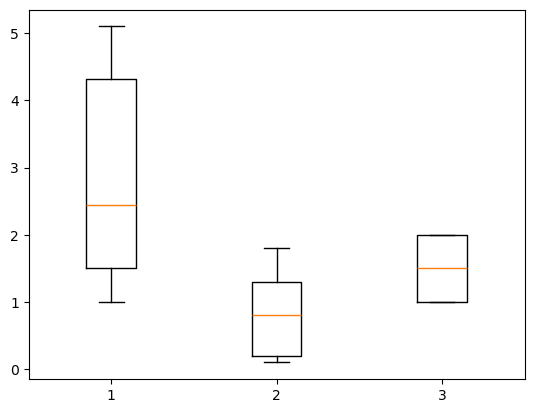

In [8]:
plt.boxplot(data)
plt.show()

In [9]:
data.corr()

,petal length,petal width,variety
petal length,1.000000,0.978856,0.969955
petal width,0.978856,1.000000,0.960158
variety,0.969955,0.960158,1.000000


In [10]:
data['variety'].iloc[:50]

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1
26    1
27    1
28    1
29    1
30    1
31    1
32    1
33    1
34    1
35    1
36    1
37    1
38    1
39    1
40    1
41    1
42    1
43    1
44    1
45    1
46    1
47    1
48    1
49    1
Name: variety, dtype: int64

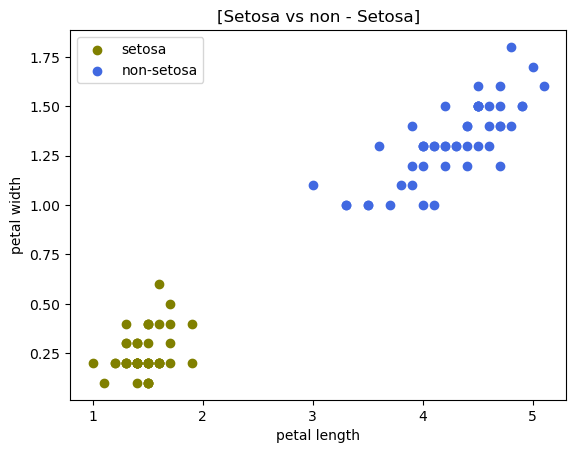

In [11]:
plt.scatter(data['petal length'].iloc[:50], data['petal width'].iloc[:50], c = 'olive', label = 'setosa')
plt.scatter(data['petal length'].iloc[50:], data['petal width'].iloc[50:], c = 'royalblue', label = 'non-setosa')
plt.legend(loc = 'best')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('[Setosa vs non - Setosa]')
plt.show()

In [12]:
feature = data[['petal length', 'petal width']]
feature.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [13]:
target = data['variety']
target.head()

0    1
1    1
2    1
3    1
4    1
Name: variety, dtype: int64

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature, target, stratify=target, random_state = 7)

In [15]:
print(f"X_train : {X_train.shape}       y_train : {y_train.shape}")
print(f"X_test : {X_test.shape}        y_test : {y_test.shape}")

X_train : (75, 2)       y_train : (75,)
X_test : (25, 2)        y_test : (25,)


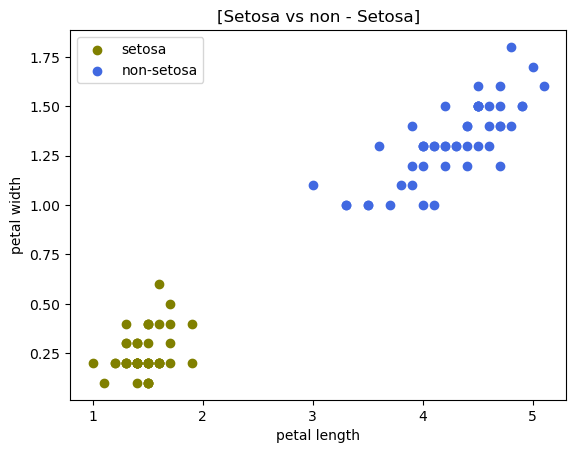

In [16]:
plt.scatter(data['petal length'].iloc[:50], data['petal width'].iloc[:50], c = 'olive', label = 'setosa')
plt.scatter(data['petal length'].iloc[50:], data['petal width'].iloc[50:], c = 'royalblue', label = 'non-setosa')
plt.legend(loc = 'best')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('[Setosa vs non - Setosa]')
plt.show()

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [18]:
scaler.fit(X_train)

StandardScaler()

In [19]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [20]:
from sklearn.svm import SVC

In [21]:
C_num = [0.000000001, 0.000001, 0.0001, 0.1, 1]
train_list =[]
test_list = []

for num in C_num:
    model = SVC(probability=True, kernel = 'linear', C = num)
    model.fit(scaled_X_train, y_train)
    train_score = model.score(scaled_X_train, y_train)
    test_score = model.score(scaled_X_test, y_test)
    train_list.append(train_score)
    test_list.append(test_score)
    
print(train_list)
print(test_list)

[0.5066666666666667, 0.5066666666666667, 0.5066666666666667, 1.0, 1.0]
[0.48, 0.48, 0.48, 1.0, 1.0]


In [22]:
scoreDF = pd.DataFrame(train_list, columns=['train'])
scoreDF['test'] = test_list
scoreDF.index = C_num
scoreDF

,train,test
1.000000e-09,0.506667,0.48
1.000000e-06,0.506667,0.48
1.000000e-04,0.506667,0.48
1.000000e-01,1.000000,1.00
1.000000e+00,1.000000,1.00


<Axes: title={'center': 'train score VS test score'}>

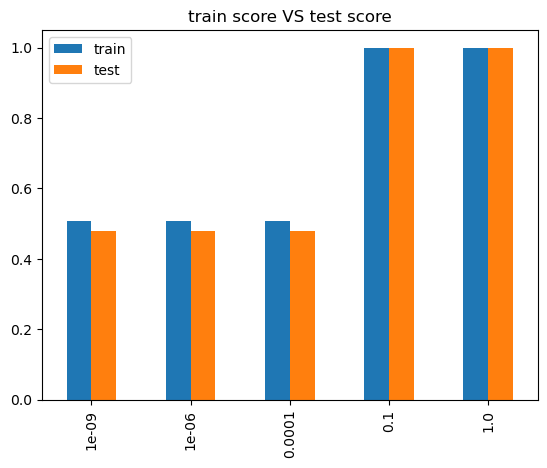

In [23]:
scoreDF.plot(kind = 'bar', title = 'train score VS test score')

In [24]:
model = SVC(probability=True, kernel = 'linear')     

# 파라미터 C 값이 작을수록 마진 간격이 넓어짐 그럼 오류도 증가함
#kernel의 default가 'rbf'라서 이거는 선형 데이터이기 때문에 kernel을 linear라고 지정해주어야 함

model.fit(scaled_X_train, y_train)

train_score = model.score(scaled_X_train, y_train)
test_score = model.score(scaled_X_test, y_test)

print(f"train score : {train_score}      test score : {test_score}")

train score : 1.0      test score : 1.0


In [25]:
print(f"model.coef_    {model.coef_}     model.intercept_    {model.intercept_}")

model.coef_    [[1.02681832 0.94084931]]     model.intercept_    [0.29307257]


In [26]:
model.classes_

array([1, 2], dtype=int64)

In [27]:
model.support_vectors_[0].T

array([-0.86090349, -0.30901555])

In [28]:
model.support_vectors_[1].T

array([-0.65194634, -0.66285016])

In [29]:
model.support_vectors_

array([[-0.86090349, -0.30901555],
       [-0.65194634, -0.66285016],
       [ 0.11422991,  0.57557096],
       [ 0.32318707,  0.39865365]])

In [30]:
model.n_support_

array([2, 2])

In [31]:
y_pred = model.predict(scaled_X_test)
y_pred

array([1, 2, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2,
       2, 2, 1], dtype=int64)

In [32]:
model.predict_proba(scaled_X_test)

array([[9.69152530e-01, 3.08474698e-02],
       [2.11455523e-02, 9.78854448e-01],
       [3.64064935e-03, 9.96359351e-01],
       [9.83712965e-01, 1.62870347e-02],
       [1.46590259e-01, 8.53409741e-01],
       [6.24405616e-03, 9.93755944e-01],
       [9.78110140e-01, 2.18898596e-02],
       [1.06887434e-02, 9.89311257e-01],
       [1.82851814e-02, 9.81714819e-01],
       [9.74629481e-01, 2.53705191e-02],
       [9.78110140e-01, 2.18898596e-02],
       [6.76495746e-06, 9.99993235e-01],
       [1.13159025e-01, 8.86840975e-01],
       [5.13392266e-03, 9.94866077e-01],
       [9.74629481e-01, 2.53705191e-02],
       [9.12038449e-01, 8.79615514e-02],
       [3.41648694e-02, 9.65835131e-01],
       [9.78110140e-01, 2.18898596e-02],
       [9.42012356e-01, 5.79876443e-02],
       [9.70602775e-01, 2.93972250e-02],
       [9.74629481e-01, 2.53705191e-02],
       [1.58052474e-02, 9.84194753e-01],
       [3.82108895e-03, 9.96178911e-01],
       [5.38796610e-03, 9.94612034e-01],
       [9.642730

In [33]:
model.decision_function(scaled_X_test)

# y = w1x1 + w2x2 +intercept_   이렇게 직접 계산해서 나온다. 이 값에 predict _proba로 나오는 확률로 계산해서 y_pred가 나온다. 

array([-1.52405424,  1.99999998,  2.85695927, -1.83354745,  0.99999999,
        2.59557458, -1.69050676,  2.33418988,  2.07152032, -1.61898642,
       -1.69050676,  3.28608135,  1.14304068,  2.69050675, -1.61898642,
       -0.97658816,  1.76202711, -1.69050676, -1.21456103, -1.54746607,
       -1.61898642,  2.14304067,  2.83354744,  2.66709492, -1.45253389])

In [34]:
# 분류
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

accuracy = accuracy_score(y_test, y_pred)
precision_score = precision_score(y_test, y_pred)
recall_score = recall_score(y_test, y_pred)
f1_score = f1_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"accuracy => {accuracy}       precision => {precision_score}")
print(f" recall => {recall_score}     f1_score => {f1_score}")
print('\n classification_report')
print(report)

accuracy => 1.0       precision => 1.0
 recall => 1.0     f1_score => 1.0

 classification_report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25


In [35]:
matrix = confusion_matrix(y_test, y_pred )
matrix

# 0 = setosa           1 = non-setosa

array([[12,  0],
       [ 0, 13]], dtype=int64)

TypeError: 1 must be a sequence

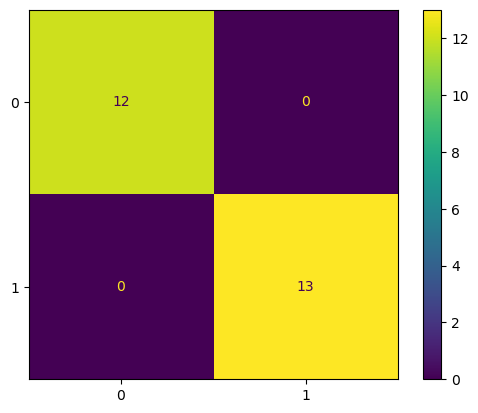

In [36]:
obj = ConfusionMatrixDisplay(matrix, display_labels=True)
obj.plot()
obj.show()

---------

### 반장의 시각화

In [38]:
import numpy as np

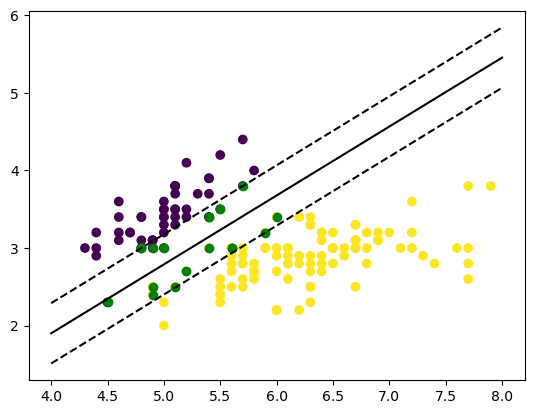

In [39]:
df=pd.read_csv('../data/iris.csv', names=["sepal_length","sepal_width","patal_width","patal_length","target"])
feature=df[df.columns[:2]]
target=df[df.columns[-1]]
target.replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":1}, inplace=True) # setosa VS versicolor+virginica

clf = SVC(kernel="linear", C=1)       # => 이 부분만 달라짐, 나머지는 고정
clf.fit(feature, target)

# coef가 기울기, intercept는 절편
w = clf.coef_[0] # 가중치값 구하기
a = -w[0] / w[1] # 기울기값 구하기
xx = np.linspace(4, 8) # x 정의역 설정 
yy = a * xx - (clf.intercept_[0]) / w[1] # 결정 경계 완성!

# 수학적으로 결정 경계(seperating hyperplane) 주변의 서포트 벡터들은
# 거리가 np.sqrt(1 + a**2)만큼 떨어져 있음 
margin = 1 / np.sqrt(np.sum(clf.coef_**2)) # 입실론 설정 = 1/||w|| = 1/가중치 벡터의 놈(norm)
# 여기서 margin은 실선과 점선사이 수직 사이 거리

yy_down = yy - np.sqrt(1 + a**2) * margin # 아래 직선
yy_up = yy + np.sqrt(1 + a**2) * margin # 위 직선

plt.plot(xx, yy, "k-") # 결정 경계 그리기
plt.plot(xx, yy_down, "k--") # 주변 서포트 벡터1
plt.plot(xx, yy_up, "k--") # 주변 서포트 벡터2

# 데이터 점들 찍기
plt.scatter(feature["sepal_length"].values,feature["sepal_width"].values, c=target.values)
# 서포트 벡터 머신 표시
plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],color="green")
plt.show()

-----------

### 윤서의 시각화 + 반장의 입맛

In [ ]:
df=pd.read_csv('../data/iris.csv', names=["sepal_length","sepal_width","patal_width","patal_length","target"])
df=df.iloc[:100]
feature=df[df.columns[2:4]]
target=df[df.columns[-1]]
target.replace({"Iris-setosa":0, "Iris-versicolor":1, "Iris-virginica":1}, inplace=True) # setosa VS versicolor+virginica

clf = SVC(kernel="linear", C=1)       # => 이 부분만 달라짐, 나머지는 고정
clf.fit(feature, target)

w = clf.coef_[0] # 가중치값 구하기
a = -w[0] / w[1] # 기울기값 구하기
xx = np.linspace(feature[feature.columns[0]].min(),feature[feature.columns[0]].max()) # x 정의역 설정 
yy = a * xx - (clf.intercept_[0]) / w[1] # 결정 경계 완성!

# 수학적으로 결정 경계(seperating hyperplane) 주변의 서포트 벡터들은
# 거리가 np.sqrt(1 + a**2)만큼 떨어져 있음 
margin = 1 / np.sqrt(np.sum(clf.coef_**2)) # 입실론 설정 = 1/||w|| = 1/가중치 벡터의 놈(norm)
yy_down = yy - np.sqrt(1 + a**2) * margin # 아래 직선
yy_up = yy + np.sqrt(1 + a**2) * margin # 위 직선

plt.plot(xx, yy, "k-") # 결정 경계 그리기
plt.plot(xx, yy_down, "k--") # 주변 서포트 벡터1
plt.plot(xx, yy_up, "k--") # 주변 서포트 벡터2

# 데이터 점들 찍기
plt.scatter(feature["patal_width"].values,feature["patal_length"].values, c=target.values)
# 서포트 벡터 머신 표시
plt.scatter(clf.support_vectors_[:, 0],clf.support_vectors_[:, 1],color="green")
plt.ylim(feature[feature.columns[1]].min()-0.5,feature[feature.columns[1]].max()+0.3)
plt.show()

-----------

# 윤서의 시각화

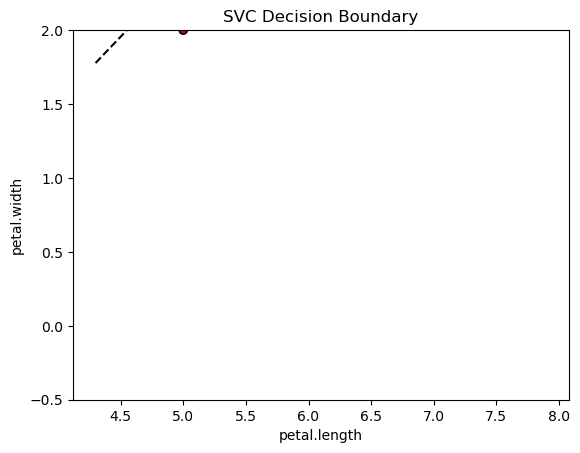

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC

featureDF = feature
targetSR = target

X = np.array(featureDF)
y = targetSR.T.replace({"Setosa":0, "Versicolor":1})

# SVC 모델 생성
svc_model = SVC(kernel='linear')
svc_model.fit(X, y)

# 결정 경계 그리기
w = svc_model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(X[:, 0].min(), X[:, 0].max())
yy = a * xx - (svc_model.intercept_[0]) / w[1]

# Support vectors
margin = 1 / np.sqrt(np.sum(svc_model.coef_ ** 2)) #분산 
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--') # 점선
plt.plot(xx, yy_up, 'k--') # 점선 

# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.ylim(-0.5,2)
plt.xlabel('petal.length')
plt.ylabel('petal.width')
plt.title('SVC Decision Boundary')
plt.show()